In [9]:
# Import the necessary libraries
import pandas as pd
import tweepy
import re
import string
import nltk
import time
from textblob import TextBlob

# Authentication
consumer_key = "smnegPeIOBfdnaDBZNmU0qLPo"
consumer_secret = "yVlbDlnDP6f3oC0Z94yY3ZHRnqH2piAxRQLKTst3jgsHXrdZuz"
access_token = "1246515307390230528-2yIYcHhAYUTI2zwAdUTE9OX4IWKfPl"
access_token_secret = "2ETXWWxdRgMq0oad68Z98Njy63ObXKRqtEZmJ9MhekFga"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Defining a method to clean the tweet text
def clean_tweet_text(text):
    text = re.sub(r"https\+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    return text

# Sentiment analysis function
def get_sentiment(tweet_text):
    analysis = TextBlob(tweet_text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# User inputs
keyword = input("Please enter a keyword or hashtag to search: ")
no_of_tweets = int(input("Please enter how many tweets to analyze: "))

# Create a list of dictionaries to store the tweets' information
tweets = []
for tweet in tweepy.Cursor(api.search_tweets, q=keyword, lang="en").items(no_of_tweets):
    try:
        tweet_dict = {}
        tweet_dict['Created At'] = tweet.created_at
        tweet_dict['Tweet Text'] = tweet.text
        tweet_dict['Sentiment'] = get_sentiment(tweet.text)
        tweets.append(tweet_dict)
    except tweepy.TweepError:
        print("Error occurred, waiting for 15 minutes...")
        time.sleep(15 * 60)

# Create a pandas dataframe to store and manipulate the data
df = pd.DataFrame(tweets)
df['Tweet Text'] = df['Tweet Text'].apply(clean_tweet_text)

# Print the sentiment value counts
print(df['Sentiment'].value_counts())

# Save the dataframe to a csv file
df.to_csv('tweets.csv', index=False)

Please enter a keyword or hashtag to search: cars
Please enter how many tweets to analyze: 200
Neutral     98
Positive    67
Negative    35
Name: Sentiment, dtype: int64


In [10]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-03-19 14:45:46+00:00,audis ceo has said that the brand will be chan...,Neutral
1,2023-03-19 14:45:44+00:00,how often do we have to remind american women ...,Neutral
2,2023-03-19 14:45:44+00:00,they have 100 ev cars for under £5k most ca...,Positive
3,2023-03-19 14:45:44+00:00,one of the most successful pedestrian streets ...,Positive
4,2023-03-19 14:45:43+00:00,🧵⬇️\nnima nouri had been working for a few mon...,Positive


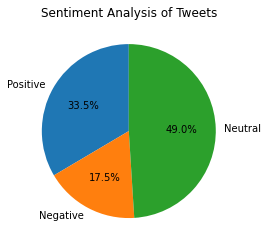

In [11]:
import matplotlib.pyplot as plt

#The cleaned data is in'tweets'
# Count the number of tweets for each sentiment label
sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
for tweet in tweets:
    sentiment_counts[tweet['Sentiment']] += 1

# Create a list of the sentiment labels and their corresponding counts
labels = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the title of the chart
ax.set_title('Sentiment Analysis of Tweets')

# Show the chart
plt.show()


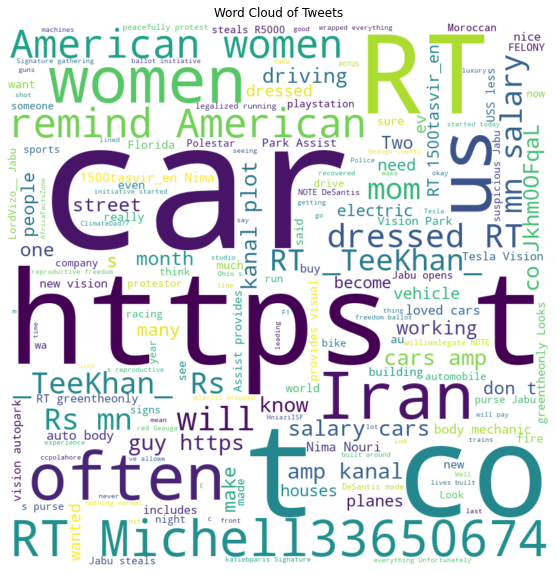

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assume that the cleaned data is stored in a list of dictionaries called 'tweets'
# Each dictionary contains keys 'Sentiment' and 'Tweet Text'

# Concatenate all the tweet texts into a single string
text = ' '.join(tweet['Tweet Text'] for tweet in tweets)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Display the word cloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# Set the title of the chart
ax.set_title('Word Cloud of Tweets')

# Show the chart
plt.show()


In [14]:
import nltk
from nltk.stem import SnowballStemmer

# Initialize the stemmer
stemmer = SnowballStemmer('english')

# Define a function to stem a text string
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Stem the tweet text in the dataframe
df['Stemmed Text'] = df['Tweet Text'].apply(stem_text)

# Display a sample of the stemmed data
print(df['Stemmed Text'].head())


0    audi ceo has said that the brand will be chang...
1    how often do we have to remind american women ...
2    they have 100 ev car for under £5k most car ar...
3    one of the most success pedestrian street in t...
4    🧵⬇️ nima nouri had been work for a few month a...
Name: Stemmed Text, dtype: object
